# NLP Task 1: Artur Xarles & Enric Azuara - Train notebook

Import all necessary packages

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn import *
import numpy as np
import os
from tqdm import tqdm
from scipy.sparse import csr_matrix
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import joblib
from sklearn.model_selection import GridSearchCV

Import all necessary functions and classes from $utils.py$

In [7]:
from utils import *

### Read data

In [8]:
train_df = pd.read_csv("quora_train_data.csv")
A_df, test_df = sklearn.model_selection.train_test_split(train_df, test_size=0.05, random_state=123)
train_df, val_df = sklearn.model_selection.train_test_split(A_df, test_size=0.05, random_state=123)

### Obtain feature vectors

In [9]:
#Get train data as list of strings 
q1_list_train = cast_list_as_strings(list(train_df.question1))
q2_list_train = cast_list_as_strings(list(train_df.question2))
full_list_train = q1_list_train + q2_list_train

#Get validation data as list of strings
q1_list_val = cast_list_as_strings(list(val_df.question1))
q2_list_val = cast_list_as_strings(list(val_df.question2))

#Get test data as list of strings
q1_list_test = cast_list_as_strings(list(test_df.question1))
q2_list_test = cast_list_as_strings(list(test_df.question2))

Get count vectorizer feature vectors and save them

In [49]:
CountVectorizer = count_vectorizer(full_list_train)
CountVectorizer.fit()
q1_train_count = CountVectorizer.transform(q1_list_train)
q2_train_count = CountVectorizer.transform(q2_list_train)
q1_val_count = CountVectorizer.transform(q1_list_val)
q2_val_count = CountVectorizer.transform(q2_list_val)

 15%|██████████▋                                                              | 42713/291897 [00:15<01:33, 2671.05it/s]


KeyboardInterrupt: 

In [ ]:
scipy.sparse.save_npz('./data/CV_train_q1.npz', q1_train_count)
scipy.sparse.save_npz('./data/CV_train_q2.npz', q2_train_count)
scipy.sparse.save_npz('./data/CV_val_q1.npz', q1_val_count)
scipy.sparse.save_npz('./data/CV_val_q2.npz', q2_val_count)

Get TF-IDF feature vectors and save them

In [ ]:
TFIDF = tf_idf(full_list_train)
TFIDF.fit()
q1_train_tfidf = TFIDF.transform(q1_list_train)
q2_train_tfidf = TFIDF.transform(q2_list_train)
q1_val_tfidf = TFIDF.transform(q1_list_val)
q2_val_tfidf = TFIDF.transform(q2_list_val)

In [8]:
scipy.sparse.save_npz('./data/tfidf_train_q1.npz', q1_train_tfidf)
scipy.sparse.save_npz('./data/tfidf_train_q2.npz', q2_train_tfidf)
scipy.sparse.save_npz('./data/tfidf_val_q1.npz', q1_val_tfidf)
scipy.sparse.save_npz('./data/tfidf_val_q2.npz', q2_val_tfidf)

Get count vectorizer with lemmatization

In [15]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Enric\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Enric\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [16]:
CountVectorizer = count_vectorizer(full_list_train, lemmatization = True)
CountVectorizer.fit()
q1_train_count_lem = CountVectorizer.transform(q1_list_train)
q2_train_count_lem = CountVectorizer.transform(q2_list_train)
q1_val_count_lem = CountVectorizer.transform(q1_list_val)
q2_val_count_lem = CountVectorizer.transform(q2_list_val)

100%|██████████████████████████████████████████████████████████████████████████| 15363/15363 [00:05<00:00, 2894.61it/s]


In [17]:
scipy.sparse.save_npz('./data/CV_lem_train_q1.npz', q1_train_count_lem)
scipy.sparse.save_npz('./data/CV_lem_train_q2.npz', q2_train_count_lem)
scipy.sparse.save_npz('./data/CV_lem_val_q1.npz', q1_val_count_lem)
scipy.sparse.save_npz('./data/CV_lem_val_q2.npz', q2_val_count_lem)

Get TF-IDF with lemmatization

In [18]:
TFIDF = tf_idf(full_list_train, lemmatization = True)
TFIDF.fit()
q1_train_tfidf_lem = TFIDF.transform(q1_list_train)
q2_train_tfidf_lem = TFIDF.transform(q2_list_train)
q1_val_tfidf_lem = TFIDF.transform(q1_list_val)
q2_val_tfidf_lem = TFIDF.transform(q2_list_val)

100%|██████████████████████████████████████████████████████████████████████████| 15363/15363 [00:05<00:00, 2934.62it/s]


In [19]:
scipy.sparse.save_npz('./data/tfidf_lem_train_q1.npz', q1_train_tfidf_lem)
scipy.sparse.save_npz('./data/tfidf_lem_train_q2.npz', q2_train_tfidf_lem)
scipy.sparse.save_npz('./data/tfidf_lem_val_q1.npz', q1_val_tfidf_lem)
scipy.sparse.save_npz('./data/tfidf_lem_val_q2.npz', q2_val_tfidf_lem)

Get count vectorizer with stemming

In [20]:
CountVectorizer = count_vectorizer(full_list_train, stemming = True)
CountVectorizer.fit()
q1_train_count_stem = CountVectorizer.transform(q1_list_train)
q2_train_count_stem = CountVectorizer.transform(q2_list_train)
q1_val_count_stem = CountVectorizer.transform(q1_list_val)
q2_val_count_stem = CountVectorizer.transform(q2_list_val)

100%|██████████████████████████████████████████████████████████████████████████| 15363/15363 [00:04<00:00, 3160.44it/s]


In [21]:
scipy.sparse.save_npz('./data/CV_stem_train_q1.npz', q1_train_count_stem)
scipy.sparse.save_npz('./data/CV_stem_train_q2.npz', q2_train_count_stem)
scipy.sparse.save_npz('./data/CV_stem_val_q1.npz', q1_val_count_stem)
scipy.sparse.save_npz('./data/CV_stem_val_q2.npz', q2_val_count_stem)

Get TF-IDF with stemming

In [22]:
TFIDF = tf_idf(full_list_train, stemming = True)
TFIDF.fit()
q1_train_tfidf_stem = TFIDF.transform(q1_list_train)
q2_train_tfidf_stem = TFIDF.transform(q2_list_train)
q1_val_tfidf_stem = TFIDF.transform(q1_list_val)
q2_val_tfidf_stem = TFIDF.transform(q2_list_val)

100%|██████████████████████████████████████████████████████████████████████████| 15363/15363 [00:05<00:00, 2982.03it/s]


In [23]:
scipy.sparse.save_npz('./data/tfidf_stem_train_q1.npz', q1_train_tfidf_stem)
scipy.sparse.save_npz('./data/tfidf_stem_train_q2.npz', q2_train_tfidf_stem)
scipy.sparse.save_npz('./data/tfidf_stem_val_q1.npz', q1_val_tfidf_stem)
scipy.sparse.save_npz('./data/tfidf_stem_val_q2.npz', q2_val_tfidf_stem)

Get extra features from questions

In [24]:
extra_features_train = get_sim_feature(train_df['question1'].apply(lambda x: str(x).split(' ')),
                    train_df['question2'].apply(lambda x: str(x).split(' ')))
extra_features_val = get_sim_feature(val_df['question1'].apply(lambda x: str(x).split(' ')),
                         val_df['question2'].apply(lambda x: str(x).split(' ')))

In [25]:
np.save('./data/extra_features_train.npy', extra_features_train)
np.save('./data/extra_features_val.npy', extra_features_val)

Read all feature vectors from stored npy files

In [10]:
#CV
q1_train_count = scipy.sparse.load_npz('./data/CV_train_q1.npz')
q2_train_count = scipy.sparse.load_npz('./data/CV_train_q2.npz')
q1_val_count = scipy.sparse.load_npz('./data/CV_val_q1.npz')
q2_val_count = scipy.sparse.load_npz('./data/CV_val_q2.npz')
#TF-IDF
q1_train_tfidf = scipy.sparse.load_npz('./data/tfidf_train_q1.npz')
q2_train_tfidf = scipy.sparse.load_npz('./data/tfidf_train_q2.npz')
q1_val_tfidf = scipy.sparse.load_npz('./data/tfidf_val_q1.npz')
q2_val_tfidf = scipy.sparse.load_npz('./data/tfidf_val_q2.npz')
#CV lemmatization
q1_train_count_lem = scipy.sparse.load_npz('./data/CV_lem_train_q1.npz')
q2_train_count_lem = scipy.sparse.load_npz('./data/CV_lem_train_q2.npz')
q1_val_count_lem = scipy.sparse.load_npz('./data/CV_lem_val_q1.npz')
q2_val_count_lem = scipy.sparse.load_npz('./data/CV_lem_val_q2.npz')
#TF-IDF lemmatization
q1_train_tfidf_lem = scipy.sparse.load_npz('./data/tfidf_lem_train_q1.npz')
q2_train_tfidf_lem = scipy.sparse.load_npz('./data/tfidf_lem_train_q2.npz')
q1_val_tfidf_lem = scipy.sparse.load_npz('./data/tfidf_lem_val_q1.npz')
q2_val_tfidf_lem = scipy.sparse.load_npz('./data/tfidf_lem_val_q2.npz')
#CV stemming
q1_train_count_stem = scipy.sparse.load_npz('./data/CV_stem_train_q1.npz')
q2_train_count_stem = scipy.sparse.load_npz('./data/CV_stem_train_q2.npz')
q1_val_count_stem = scipy.sparse.load_npz('./data/CV_stem_val_q1.npz')
q2_val_count_stem = scipy.sparse.load_npz('./data/CV_stem_val_q2.npz')
#TF-IDF stemming
q1_train_tfidf_stem = scipy.sparse.load_npz('./data/tfidf_stem_train_q1.npz')
q2_train_tfidf_stem = scipy.sparse.load_npz('./data/tfidf_stem_train_q2.npz')
q1_val_tfidf_stem = scipy.sparse.load_npz('./data/tfidf_stem_val_q1.npz')
q2_val_tfidf_stem = scipy.sparse.load_npz('./data/tfidf_stem_val_q2.npz')
#Extra features
extra_features_train = np.load('./data/extra_features_train.npy')
extra_features_val = np.load('./data/extra_features_val.npy')

### Train models

First, we train a basic logistic regression model with the Count vectorizer vectors and TF-IDF vectors using different merging strategies (horitzontal stacking, difference between vectors, similarity between vectors and another metric). We use accuracy and logloss to evaluate the models in validation set

In [27]:
'''
Count Vectorizer
'''
print('---------------------------------\nMethods using Count Vectorizer features:\n---------------------------------')

print('**** \nStack features \n****')
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
features_train = stack_features(q1_train_count, q2_train_count)
features_val = stack_features(q1_val_count, q2_val_count)
logistic.fit(features_train, train_df['is_duplicate'].values)
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values, logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))
joblib.dump(logistic, './models/log_CV_stack.pkl')

print('**** \nDifference of features \n****')
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
features_train = difference(q1_train_count, q2_train_count)
features_val = difference(q1_val_count, q2_val_count)
logistic.fit(features_train, train_df['is_duplicate'].values)
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values, logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))
joblib.dump(logistic, './models/log_CV_diff.pkl')

print('**** \nSimilarity of features \n****')
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
features_train = similarity(q1_train_count, q2_train_count)
features_val = similarity(q1_val_count, q2_val_count)
logistic.fit(features_train, train_df['is_duplicate'].values)
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values, logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))
joblib.dump(logistic, './models/log_CV_sim.pkl')

print('**** \nDifferent/product features \n****')
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
features_train = different_product(q1_train_count, q2_train_count)
features_val = different_product(q1_val_count, q2_val_count)
logistic.fit(features_train, train_df['is_duplicate'].values)
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values, logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))
joblib.dump(logistic, './models/log_CV_difprod.pkl')

'''
TF-IDF features
'''
print('\n---------------------------------\nMethods using TF-IDF features:\n---------------------------------')

print('**** \nStack features \n****')
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
features_train = stack_features(q1_train_tfidf, q2_train_tfidf)
features_val = stack_features(q1_val_tfidf, q2_val_tfidf)
logistic.fit(features_train, train_df['is_duplicate'].values)
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values, logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))
joblib.dump(logistic, './models/log_tfidf_stack.pkl')

print('**** \nDifference of features \n****')
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
features_train = difference(q1_train_tfidf, q2_train_tfidf)
features_val = difference(q1_val_tfidf, q2_val_tfidf)
logistic.fit(features_train, train_df['is_duplicate'].values)
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values, logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))
joblib.dump(logistic, './models/log_tfidf_dif.pkl')

print('**** \nSimilarity of features \n****')
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
features_train = similarity(q1_train_tfidf, q2_train_tfidf)
features_val = similarity(q1_val_tfidf, q2_val_tfidf)
logistic.fit(features_train, train_df['is_duplicate'].values)
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values, logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))
joblib.dump(logistic, './models/log_tfidf_sim.pkl')

print('**** \nDifferent/product features \n****')
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
features_train = different_product(q1_train_tfidf, q2_train_tfidf)
features_val = different_product(q1_val_tfidf, q2_val_tfidf)
logistic.fit(features_train, train_df['is_duplicate'].values)
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values, logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))
joblib.dump(logistic, './models/log_tfidf_difprod.pkl')

---------------------------------
Methods using Count Vectorizer features:
---------------------------------
**** 
Stack features 
****
logloss validation: 0.5176230416122677
Accuracy validation: 0.7490073553342446
**** 
Difference of features 
****
logloss validation: 0.460220255923132
Accuracy validation: 0.7715940896960229
**** 
Similarity of features 
****
logloss validation: 0.5940441277862787
Accuracy validation: 0.6416064570721864
**** 
Different/product features 
****
logloss validation: 0.4576782926453907
Accuracy validation: 0.7715940896960229

---------------------------------
Methods using TF-IDF features:
---------------------------------
**** 
Stack features 
****


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


logloss validation: 0.6723110022656916
Accuracy validation: 0.724598060274686
**** 
Difference of features 
****
logloss validation: 0.48640039578895083
Accuracy validation: 0.7777126863242856
**** 
Similarity of features 
****
logloss validation: 0.5805705852543142
Accuracy validation: 0.6506541691075962
**** 
Different/product features 
****
logloss validation: 0.7133509370738693
Accuracy validation: 0.7513506476599623


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


['./models/log_tfidf_difprod.pkl']

We can see that the one that gets better results in terms of accuracy is the one using TF-IDF feature vectors and using the absolute difference of the feature vectores as approach. We will try to use both feature vectors (count vectorizer and tfidf) using the difference approach and adding the cosine similarity to see if we improve the results.

In [28]:
features_train = scipy.sparse.hstack((difference(q1_train_count, q2_train_count),
                                      difference(q1_train_tfidf, q2_train_tfidf),
                                      similarity(q1_train_count, q2_train_count),
                                      similarity(q1_train_tfidf, q2_train_tfidf)))
features_val = scipy.sparse.hstack((difference(q1_val_count, q2_val_count),
                                    difference(q1_val_tfidf, q2_val_tfidf),
                                    similarity(q1_val_count, q2_val_count),
                                    similarity(q1_val_tfidf, q2_val_tfidf)))

logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
logistic.fit(features_train, train_df['is_duplicate'].values)
joblib.dump(logistic, './models/log_CV_tfidf_mix.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))

logloss validation: 0.4782245286309448
Accuracy validation: 0.782464362429213


As we can see, the results are a bit better in the validation set. Therefore, we will keep using this structure of features for the following attemps of improving the model. In the next step, we will try to apply lemmatization and stemming when creating the feature vectors to see if they can improve the results.

*Applying lemmatization*

In [29]:
features_train = scipy.sparse.hstack((difference(q1_train_count_lem, q2_train_count_lem),
                                      difference(q1_train_tfidf_lem, q2_train_tfidf_lem),
                                      similarity(q1_train_count_lem, q2_train_count_lem),
                                      similarity(q1_train_tfidf_lem, q2_train_tfidf_lem)))
features_val = scipy.sparse.hstack((difference(q1_val_count_lem, q2_val_count_lem),
                                    difference(q1_val_tfidf_lem, q2_val_tfidf_lem),
                                    similarity(q1_val_count_lem, q2_val_count_lem),
                                    similarity(q1_val_tfidf_lem, q2_val_tfidf_lem)))

logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
logistic.fit(features_train, train_df['is_duplicate'].values)
joblib.dump(logistic, './models/log_CV_tfidf_mix_lem.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))

logloss validation: 0.47654072573649153
Accuracy validation: 0.7740024734752327


*Applying stemming*

In [30]:
features_train = scipy.sparse.hstack((different_product(q1_train_count_stem, q2_train_count_stem),
                                      different_product(q1_train_tfidf_stem, q2_train_tfidf_stem),
                                      similarity(q1_train_count_stem, q2_train_count_stem),
                                      similarity(q1_train_tfidf_stem, q2_train_tfidf_stem)))
features_val = scipy.sparse.hstack((different_product(q1_val_count_stem, q2_val_count_stem),
                                    different_product(q1_val_tfidf_stem, q2_val_tfidf_stem),
                                    similarity(q1_val_count_stem, q2_val_count_stem),
                                    similarity(q1_val_tfidf_stem, q2_val_tfidf_stem)))

logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
logistic.fit(features_train, train_df['is_duplicate'].values)
joblib.dump(logistic, './models/log_CV_tfidf_mix_stem.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))

C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


logloss validation: 0.530299058365541
Accuracy validation: 0.761635097311723


We can see that neither lemmatization or stemming improve the results, so we will not use them.

As a final step, we will try to add the extra features previously computed to see if they can add valuable information to the model.

In [96]:
Variable_X_train = Variable_KeyWords(train_df)
features_train_2 = scipy.sparse.hstack((difference(q1_train_count, q2_train_count),
                                      difference(q1_train_tfidf, q2_train_tfidf),
                                      similarity(q1_train_count, q2_train_count),
                                      similarity(q1_train_tfidf, q2_train_tfidf),
                                      np.hstack([extra_features_train, Variable_X_train])))

Variable_X_val = Variable_KeyWords(val_df)
features_val_2 = scipy.sparse.hstack((difference(q1_val_count, q2_val_count),
                                    difference(q1_val_tfidf, q2_val_tfidf),
                                    similarity(q1_val_count, q2_val_count),
                                    similarity(q1_val_tfidf, q2_val_tfidf),
                                    np.hstack([extra_features_val, Variable_X_val])))

logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123)
logistic.fit(features_train_2, train_df['is_duplicate'].values)
joblib.dump(logistic, './models/log_CV_tfidf_extra_mix.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            logistic.predict_proba(features_val_2))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val_2)).mean()))

logloss validation: 0.4567309766744149
Accuracy validation: 0.7912517086506542


The extra features improve a little bit the results so we will keep this feature combination for the models. Finally, using the features selected we will try different models (xgboost with different parameters) to see if we can improve the results.

In [115]:
estimator = XGBClassifier(random_state = 123)

parameters = {
    'max_depth': [10],
    'n_estimators': range(1200, 1600, 200),
    'learning_rate': [0.1, 0.05]
}

grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = sklearn.model_selection.KFold(2),
    verbose=True
)

#grid_search.fit(features_train_2, train_df['is_duplicate'].values)

#print(grid_search.best_estimator_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Enric\anaconda3\envs\Algebra\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1400, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [22]:
Best = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1,
              monotone_constraints='()', n_estimators=1400, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Best.fit(features_train_2, train_df['is_duplicate'].values)
joblib.dump(Best, './models/best_model.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            Best.predict_proba(features_val_2))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == Best.predict(features_val_2)).mean()))

logloss validation: 0.3869561994078014
Accuracy validation: 0.8098678643494109


As we can see the best xgboost model has a better performance than the logistic one in the evaluation set so we will keep this one as our final model using the previously mentioned features.

#### Logistic model trials

Now we will check changing some parameters of the logistic model.

In [109]:
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear", random_state=123,
                                                  penalty="l1")
logistic.fit(features_train_2, train_df['is_duplicate'].values)
joblib.dump(logistic, './models/logistic_l1.pkl')
print('logloss test: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            logistic.predict_proba(features_val_2))))
print('Accuracy test: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val_2)).mean()))

logloss test: 0.44647572263781243
Accuracy test: 0.7896895137668424


We see that changing to the l1 does not improve our results (we had 0.7912)

### Train final model with train + validation data

In [14]:
full_list_all_train = q1_list_train + q2_list_train + q1_list_val + q2_list_val
CountVectorizer = count_vectorizer(full_list_all_train)
CountVectorizer.fit()
q1_all_train_count = CountVectorizer.transform(q1_list_train + q1_list_val)
q2_all_train_count = CountVectorizer.transform(q2_list_train + q2_list_val)
q1_test_count = CountVectorizer.transform(q1_list_test)
q2_test_count = CountVectorizer.transform(q2_list_test)

100%|██████████| 16172/16172 [00:05<00:00, 3099.44it/s]


In [15]:
TFIDF = tf_idf(full_list_all_train)
TFIDF.fit()
q1_all_train_tfidf = TFIDF.transform(q1_list_train + q1_list_val)
q2_all_train_tfidf = TFIDF.transform(q2_list_train + q2_list_val)
q1_test_tfidf = TFIDF.transform(q1_list_test)
q2_test_tfidf = TFIDF.transform(q2_list_test)

100%|██████████| 16172/16172 [00:05<00:00, 3113.60it/s]


In [16]:
all_train_df = pd.concat((train_df, val_df))

In [17]:
extra_features_all_train = get_sim_feature(all_train_df['question1'].apply(lambda x: str(x).split(' ')),
                    all_train_df['question2'].apply(lambda x: str(x).split(' ')))
extra_features_test = get_sim_feature(test_df['question1'].apply(lambda x: str(x).split(' ')),
                    test_df['question2'].apply(lambda x: str(x).split(' ')))

In [18]:
Variable_X_all_train = Variable_KeyWords(all_train_df)
final_features_train = scipy.sparse.hstack((difference(q1_all_train_count, q2_all_train_count),
                                      difference(q1_all_train_tfidf, q2_all_train_tfidf),
                                      similarity(q1_all_train_count, q2_all_train_count),
                                      similarity(q1_all_train_tfidf, q2_all_train_tfidf),
                                      np.hstack([extra_features_all_train, Variable_X_all_train])))
Variable_X_test = Variable_KeyWords(test_df)
final_features_test = scipy.sparse.hstack((difference(q1_test_count, q2_test_count),
                                    difference(q1_test_tfidf, q2_test_tfidf),
                                    similarity(q1_test_count, q2_test_count),
                                    similarity(q1_test_tfidf, q2_test_tfidf),
                                    np.hstack([extra_features_test, Variable_X_test])))

In [19]:
scipy.sparse.save_npz('./data/final_features_train.npz', final_features_train)
scipy.sparse.save_npz('./data/final_features_test.npz', final_features_test)

Once stored the whole final features, we read them and train the final logistic model.

In [20]:
final_features_train = scipy.sparse.load_npz('./data/final_features_train.npz')
final_features_test = scipy.sparse.load_npz('./data/final_features_test.npz')

In [23]:
Best = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1,
              monotone_constraints='()', n_estimators=1400, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Best.fit(final_features_train, all_train_df['is_duplicate'].values)
joblib.dump(Best, './models/final_model.pkl')
print('logloss test: ' + str(sklearn.metrics.log_loss(test_df['is_duplicate'].values,
                                                            Best.predict_proba(final_features_test))))
print('Accuracy test: ' + str((test_df['is_duplicate'].values == Best.predict(final_features_test)).mean()))

logloss test: 0.3820196153925488
Accuracy test: 0.8136284936928023


We can check the that we have a logloss of $0.382$ and an accuracy of $0.814$ in the test data

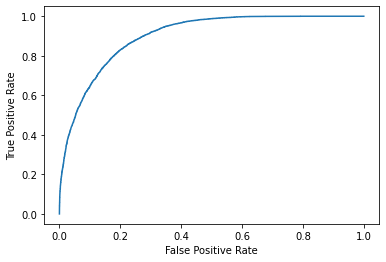

AUC: 0.8995489030628392


In [28]:
fpr, tpr, _ = sklearn.metrics.roc_curve(test_df['is_duplicate'].values,  Best.predict_proba(final_features_test)[:, 1])

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC: ' + str(sklearn.metrics.roc_auc_score(test_df['is_duplicate'].values, Best.predict_proba(final_features_test)[:, 1])))

We obtain an area under the curve of 0.9, which is a great result